## Data Preparation

In [5]:
# install scikit-learn, tensorflow, pandas, matplotlib, numpy

'conda' 不是內部或外部命令、可執行的程式或批次檔。


In [77]:
# # download the data
import wget
url = "https://raw.githubusercontent.com/waccoco/2024_NCTU_MI_course/master/Dataset/Salary_Data2.csv"
output_path = './Salary_Data2.csv'
wget.download(url, out=output_path)

100% [................................................................................] 1040 / 1040

'./Salary_Data2 (1).csv'

In [78]:
import pandas as pd

output_path = './Salary_Data2.csv'
path = output_path
df = pd.read_csv(output_path)
display(df.head())

,YearsExperience,EducationLevel,City,Salary
0,3.0,大學,城市A,45.9
1,7.8,碩士以上,城市C,80.5
2,2.3,高中以下,城市A,25.2
3,5.1,高中以下,城市A,30.4
4,10.0,碩士以上,城市B,65.7


In [79]:
df.info()
df.describe(include='all').round(2)

#round 函数在 Python（包括 Pandas 库中）的功能是对浮点数进行四舍五入到给定的精度。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  36 non-null     float64
 1   EducationLevel   36 non-null     object 
 2   City             36 non-null     object 
 3   Salary           36 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.2+ KB


,YearsExperience,EducationLevel,City,Salary
count,36.00,36,36,36.00
unique,NaN,3,3,NaN
top,NaN,碩士以上,城市A,NaN
freq,NaN,16,20,NaN
mean,5.47,NaN,NaN,51.70
std,2.71,NaN,NaN,17.53
min,1.20,NaN,NaN,24.90
25%,3.38,NaN,NaN,38.05
50%,5.15,NaN,NaN,49.20
75%,7.65,NaN,NaN,65.75


## Transform the Categorical data to numerical data
### @ LabelEncoder：把類別型資料轉換成0,1,2,…的數值標籤 (特徵之間有順序或大小分別)
   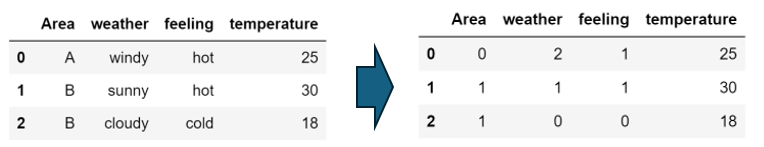

### @ OneHotEncoder：把類別型資料轉換成0與1的數值標籤 (特徵之間沒有順序或大小分別)
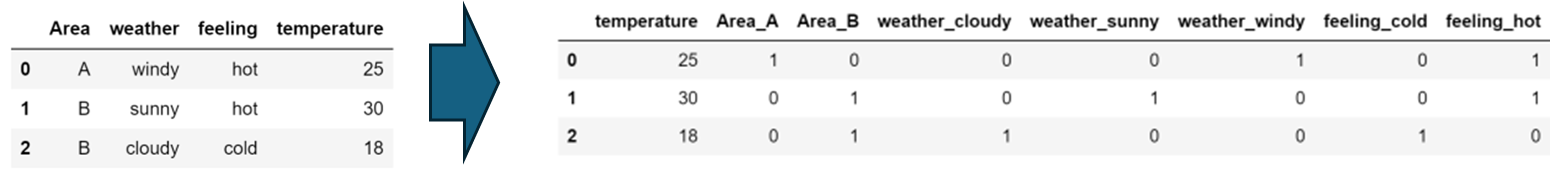

### Exercise : Try to use the one-hot encoder to encode the Categorical data into numerical data

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

########################################################
df_encoded =  pd.get_dummies(df)
df_encoded = df_encoded.astype(int)
########################################################

# 顯示轉換後的DataFrame
display(df_encoded.head(5))

,YearsExperience,Salary,EducationLevel_大學,EducationLevel_碩士以上,EducationLevel_高中以下,City_城市A,City_城市B,City_城市C
0,3,45,1,0,0,1,0,0
1,7,80,0,1,0,0,0,1
2,2,25,0,0,1,1,0,0
3,5,30,0,0,1,1,0,0
4,10,65,0,1,0,0,1,0


In [82]:
# Delete redundant features
########################################################
df_encoded = df_encoded.drop(columns=['EducationLevel_高中以下','City_城市C'])
########################################################

df_encoded.to_csv('./encoded.csv')
y= df_encoded['Salary']
x= df_encoded.drop(columns=['Salary'])
display(x.head(5))
# print(set(x), set(y))

,YearsExperience,EducationLevel_大學,EducationLevel_碩士以上,City_城市A,City_城市B
0,3,1,0,1,0
1,7,0,1,0,0
2,2,0,0,1,0
3,5,0,0,1,0
4,10,0,1,0,1


In [83]:
# splitting dataset to training set and testing set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200)

##  data visualization


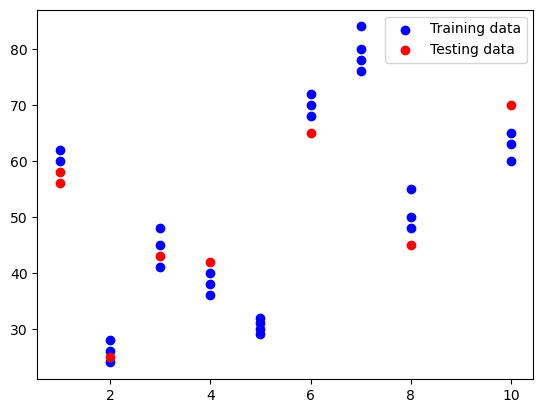

In [64]:
plt.scatter(x_train['YearsExperience'], y_train, color='blue', label='Training data')
plt.scatter(x_test['YearsExperience'], y_test, color='red', label='Testing data')
plt.legend()
plt.show()

## Build ANN model

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# model = Sequential([
    # Dense(1, input_shape=(1,), activation='linear')
#     Dense(5, input_shape=(x.shape[1],), activation='linear')
# ])

model = Sequential([
    Dense(5, input_shape=(x.shape[1],), activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='linear')
])

# Sequential.help

model.compile(optimizer=Adam(learning_rate=0.005), loss='mse')


## Training ANN model

In [85]:
from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=2)

Epoch 1/200
11/11 [==============================] - 2s 56ms/step - loss: 2549.1589 - val_loss: 4092.9080
Epoch 2/200
11/11 [==============================] - 0s 11ms/step - loss: 2488.9912 - val_loss: 3982.9412
Epoch 3/200
11/11 [==============================] - 0s 12ms/step - loss: 2419.4016 - val_loss: 3866.6414
Epoch 4/200
11/11 [==============================] - 0s 10ms/step - loss: 2345.7561 - val_loss: 3722.6318
Epoch 5/200
11/11 [==============================] - 0s 11ms/step - loss: 2249.2051 - val_loss: 3553.3914
Epoch 6/200
11/11 [==============================] - 0s 10ms/step - loss: 2137.7312 - val_loss: 3343.0830
Epoch 7/200
11/11 [==============================] - 0s 11ms/step - loss: 1994.2345 - val_loss: 3096.8669
Epoch 8/200
11/11 [==============================] - 0s 10ms/step - loss: 1826.5840 - val_loss: 2789.5029
Epoch 9/200
11/11 [==============================] - 0s 11ms/step - loss: 1616.9532 - val_loss: 2404.1697
Epoch 10/200
11/11 [==========================

## Model evaluation

In [86]:
history.history['loss'][:10]

[2549.158935546875,
 2488.9912109375,
 2419.401611328125,
 2345.756103515625,
 2249.205078125,
 2137.731201171875,
 1994.2344970703125,
 1826.583984375,
 1616.9532470703125,
 1360.94189453125]

1/1 [==============================] - 0s 391ms/step - loss: 33.5780


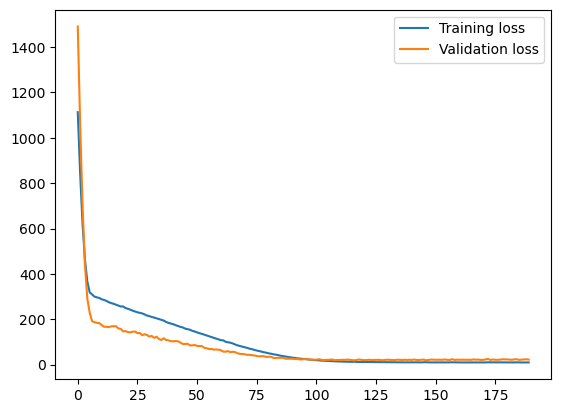

In [87]:
# model.evaluate(x_test, y_test)
loss = model.evaluate(x_test, y_test)

# 繪製訓練歷史
plt.plot(history.history['loss'][10:], label='Training loss')
plt.plot(history.history['val_loss'][10:], label='Validation loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 227ms/step


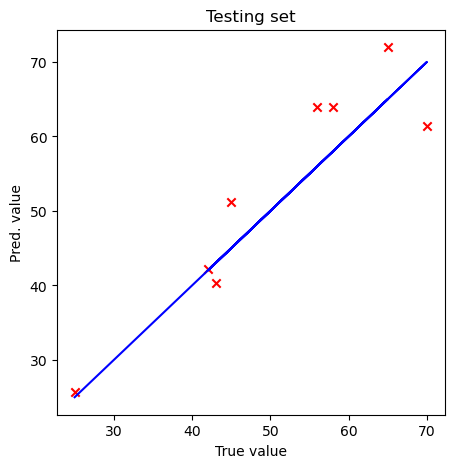

1/1 [==============================] - 0s 59ms/step


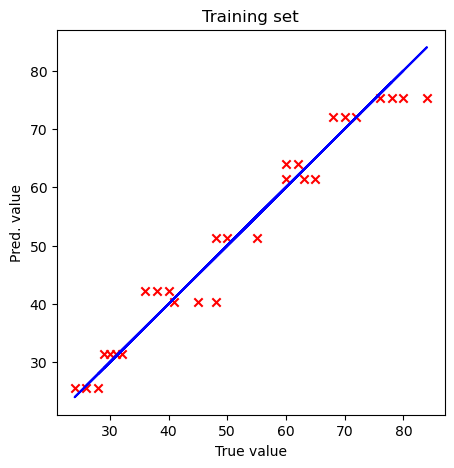

In [88]:
def plot_scatter (x, y, title, x_label, y_label,n):
    # plt.subplot(2, 2, n);
    plt.figure(figsize=(5, 5));
    plt.plot(x, x, color="blue", label="d")
    plt.scatter(x, y, marker="x", color="red")
    # plt.axis((0,210, 0,210))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

y_pred = model.predict(x_test)
plot_scatter(y_test, y_pred, "Testing set", "True value", "Pred. value",1)

y_pred = model.predict(x_train)
plot_scatter(y_train, y_pred, "Training set", "True value", "Pred. value",2)


1/1 [==============================] - 0s 73ms/step


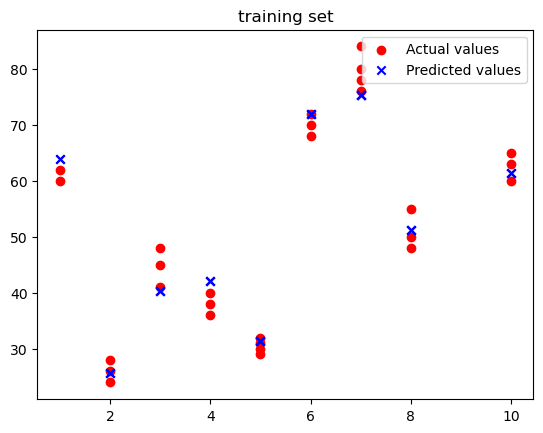

1/1 [==============================] - 0s 64ms/step


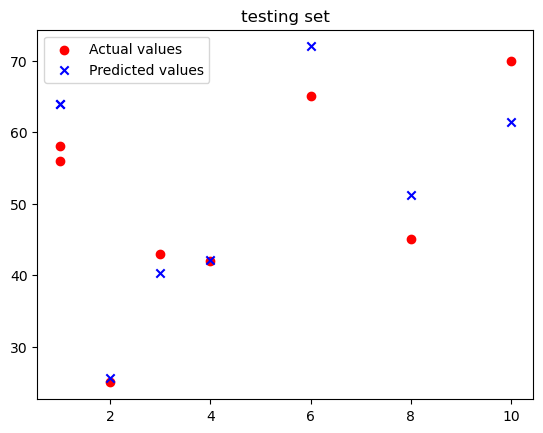

In [89]:
y_pred = model.predict(x_train)
plt.scatter(x_train['YearsExperience'], y_train, color='red', label='Actual values')
plt.scatter(x_train['YearsExperience'], y_pred, color='blue', marker='x', label='Predicted values')
plt.title('training set')
plt.legend()
plt.show()

y_pred = model.predict(x_test)
plt.scatter(x_test['YearsExperience'], y_test, color='red', label='Actual values')
plt.scatter(x_test['YearsExperience'], y_pred, color='blue', marker='x', label='Predicted values')
plt.title('testing set')
plt.legend()
plt.show()

In [90]:
## coefficient of determination, denoted R2
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2_test = r2_score(y_test, y_pred)

y_pred = model.predict(x_train)
r2_train = r2_score(y_train, y_pred)

print(r2_train, r2_test)

1/1 [==============================] - 0s 68ms/step
0.9626705204558268 0.8192302011376019


In [91]:
## Pearson correlation function
from sklearn.datasets import make_regression
from sklearn.feature_selection import r_regression

y_pred = model.predict(x_test)
psc_test = r_regression(y_test.to_numpy().reshape(-1, 1) , y_pred.ravel())[0]
y_pred = model.predict(x_train)
psc_train = r_regression(y_train.to_numpy().reshape(-1, 1), y_pred.ravel())[0]
print(psc_test, psc_train)

1/1 [==============================] - 0s 60ms/step
0.9289096784309699 0.9816255816488373
